***Task 7.1***
| 65011428 Papinwich Asnapetch

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

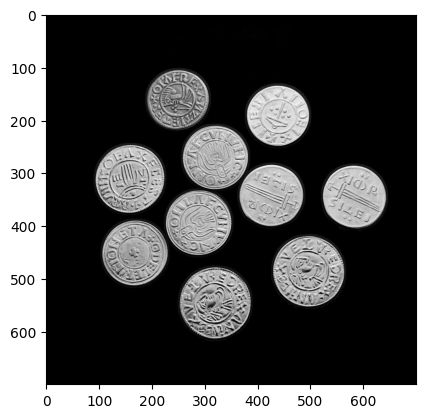

In [2]:
# Load Image
img = cv2.imread('coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

def imgDisplay(localImg):
    plt.figure(figsize= (11, 11))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap= 'gray')
    
    plt.subplot(1, 2, 2)
    plt.imshow(localImg, cmap= 'gray')
    
    plt.show()

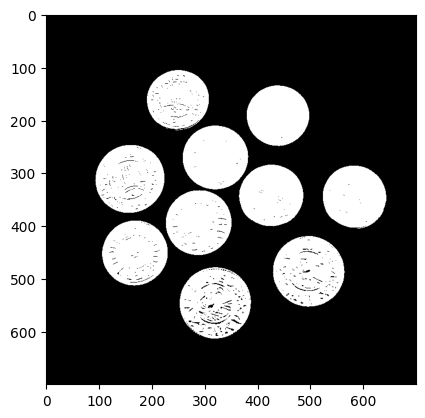

In [3]:
# Apply threshold
ret, img_thresh = cv2.threshold(img, 45, 255, cv2.THRESH_BINARY)

plt.imshow(img_thresh, cmap= 'gray')

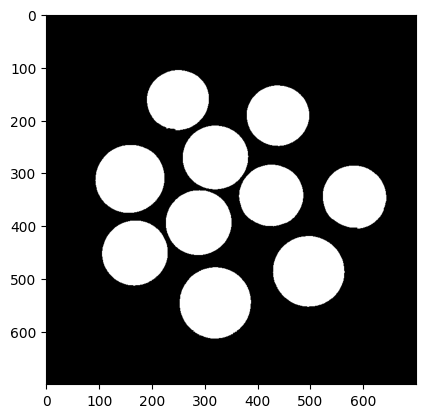

In [4]:
# Reduce noise
img_res = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, np.ones((3,3)), iterations= 2)

plt.imshow(img_res, cmap= 'gray')

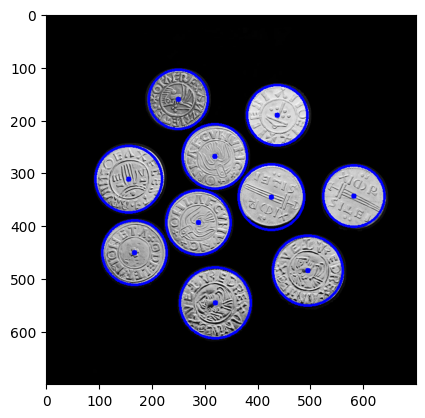

In [7]:
# Get circles
circles = cv2.HoughCircles(img_res, cv2.HOUGH_GRADIENT,
                           dp= 0.8, minDist= 30,
                           param1= 10, param2= 8, 
                           minRadius= 50, maxRadius= 80)


img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for x, y, r in circles[0]:
    cv2.circle(img_rgb, (int(x), int(y)), int(r), (0, 0, 255), thickness= 3)
    cv2.circle(img_rgb, (int(x), int(y)), 5, (0, 0, 255), thickness= -1)
    
plt.imshow(img_rgb)